In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Set default style for plots



In [3]:
# Load the dataset
hal= pd.read_csv(r"/content/HAL.NS_stock_data.csv")
hal


,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,2018-04-02,563.849976,577.500000,559.000000,574.625000,480.766510,352730,HAL.NS
1,2018-04-03,570.500000,573.500000,563.174988,564.299988,472.128052,115130,HAL.NS
2,2018-04-04,565.000000,570.000000,557.500000,557.950012,466.815247,163364,HAL.NS
3,2018-04-05,561.000000,565.625000,554.750000,556.974976,465.999512,149988,HAL.NS
4,2018-04-06,551.750000,559.424988,550.025024,551.424988,461.355957,146026,HAL.NS
...,...,...,...,...,...,...,...,...
1495,2024-04-23,3800.000000,3831.850098,3783.050049,3795.699951,3795.699951,1321429,HAL.NS
1496,2024-04-24,3826.100098,4000.000000,3812.500000,3946.699951,3946.699951,4429158,HAL.NS
1497,2024-04-25,3958.600098,4035.000000,3939.000000,4000.750000,4000.750000,2632613,HAL.NS
1498,2024-04-26,4019.949951,4039.949951,3966.350098,3984.399902,3984.399902,1432727,HAL.NS


In [5]:
hal1 = hal.drop(['Unnamed: 0','adjclose','ticker'], axis = 1)

In [6]:
hal1

,open,high,low,close,volume
0,563.849976,577.500000,559.000000,574.625000,352730
1,570.500000,573.500000,563.174988,564.299988,115130
2,565.000000,570.000000,557.500000,557.950012,163364
3,561.000000,565.625000,554.750000,556.974976,149988
4,551.750000,559.424988,550.025024,551.424988,146026
...,...,...,...,...,...
1495,3800.000000,3831.850098,3783.050049,3795.699951,1321429
1496,3826.100098,4000.000000,3812.500000,3946.699951,4429158
1497,3958.600098,4035.000000,3939.000000,4000.750000,2632613
1498,4019.949951,4039.949951,3966.350098,3984.399902,1432727


In [7]:
hal1.isnull().sum()


,0
open,0
high,0
low,0
close,0
volume,0


In [8]:
hal1.dtypes

,0
open,float64
high,float64
low,float64
close,float64
volume,int64


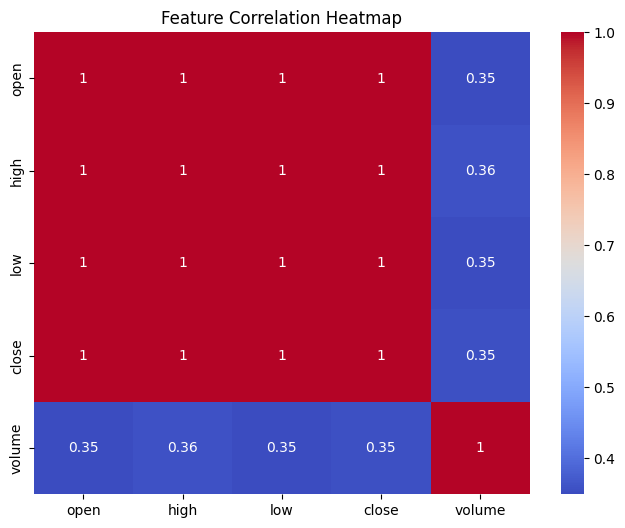

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(hal1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


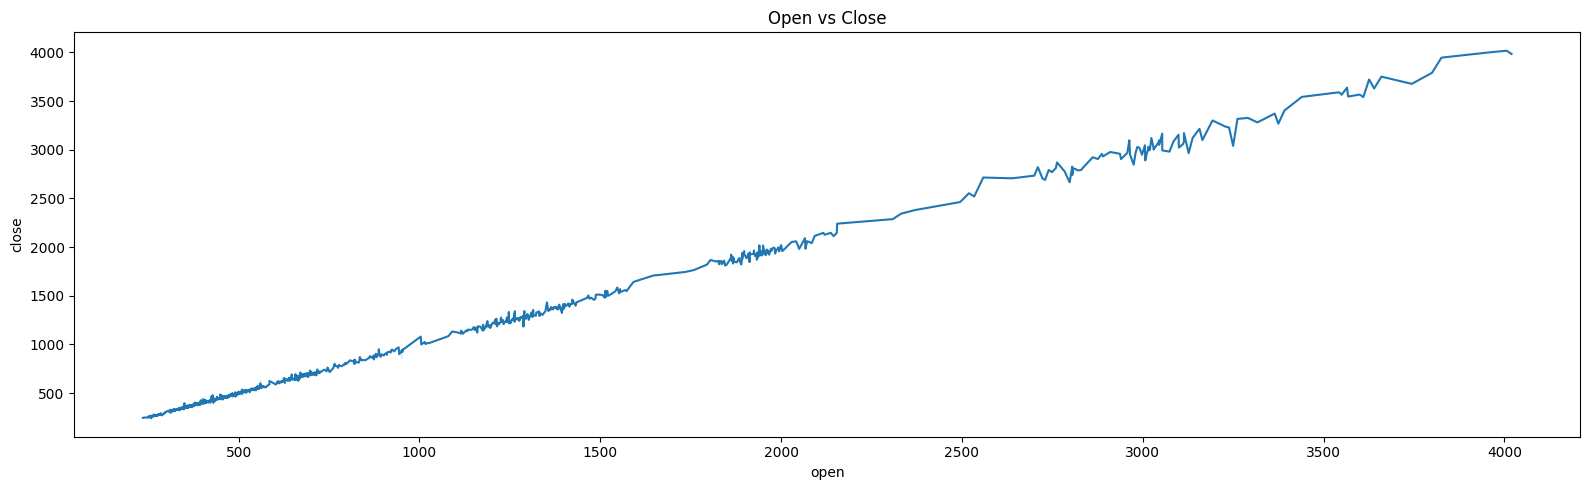

In [10]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=hal1, x='open', y='close')
plt.title("Open vs Close")
plt.tight_layout()
plt.show()


In [11]:
# Define input and output
features = ['open', 'high', 'low', 'volume']
X = hal1[features]
y = hal1['close']


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Standardize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test_scaled)

# Combine predictions and actuals into a DataFrame
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results.head()


,Actual,Predicted
0,1238.000000,1232.567248
1,1968.449951,1967.721879
2,362.299988,360.323812
3,377.250000,374.581709
4,402.049988,405.054897


In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 88.24
R² Score: 0.9998


In [18]:
# Example: Predict with new data [open, high, low, volume]
new_data = np.array([[4006.350098,3044.750000,3975.300049,1491]])
new_data_scaled = scaler.transform(new_data)
predicted_close = model.predict(new_data_scaled)
print(f"Predicted Close Price: {predicted_close[0]:.2f}")

Predicted Close Price: 3156.48


In [ ]:
import pickle
with open("hal_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("hal_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
